# E-commerce Metric Delivery Analysis

### By: Paula Sardi 

For my personal project in my Data Science Bootcamp we were asked to chose a database to do Exploratory Data Analysis (EDA).

I chose the [Brazilean E-Commerce Public Data Set by olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce) available in Kaggle.

### Diving in

Looking into the data, I start by looking into the number of orders through time. 

Mainly to understand the flow of businessThis tells me if the business demand has grown or not.

As shown in the graph below, if we disregard that last quarter on Q4'18, we can appreciate a growing curve in terms of orders/demand.

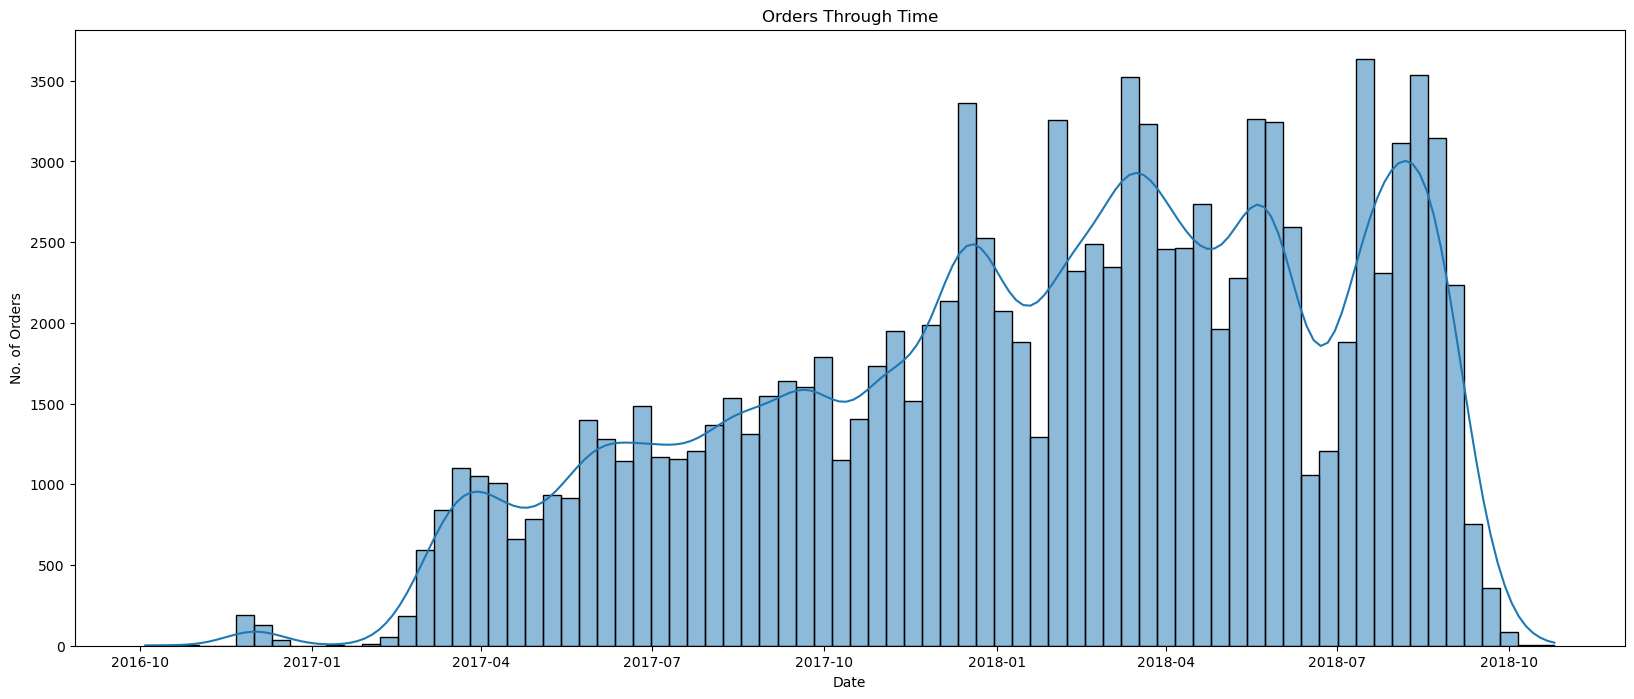

In [20]:
plt.figure(figsize=(20, 8))
sns.histplot(
    data=data, 
    x = 'estimated_date',
    stat = 'count',
    kde = True
    )
plt.title('Orders Through Time')
plt.xlabel('Date')
plt.ylabel('No. of Orders');


As orders are in a positive curve the company growth is clear.
However there is some downfalls mid-2017 that are somewhat inconsistent with growth flow.

Below is a breakdown of the graph above into each year. In 2016 histoplot we can assume was the start year for the company.
In 2017 shows to be the year of growth. However, on 2018 we see an irregularity for a company that's in a growth path.

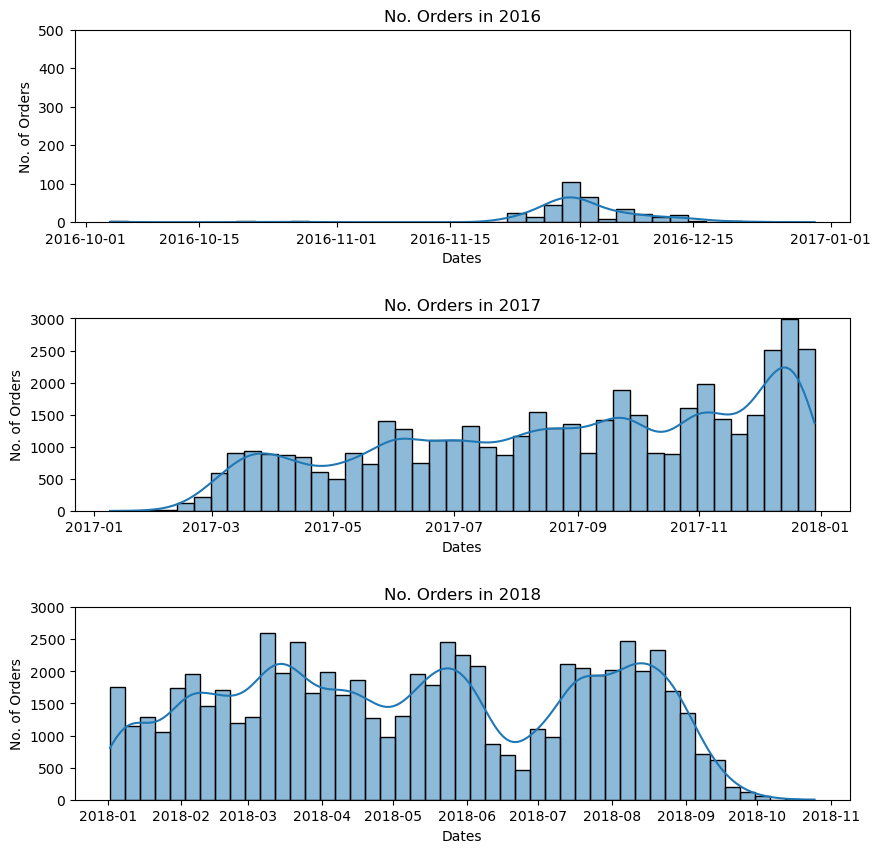

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

sns.histplot(
    data = data[data['estimated_date'].dt.year == 2016], 
    x = 'estimated_date',
    stat = 'count',
    kde = True,
    ax = axes[0] 
    )
axes[0].set_title('No. Orders in 2016')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('No. of Orders')
axes[0].set_ylim(0, 500)

sns.histplot(
    data = data[data['estimated_date'].dt.year == 2017], 
    x = 'estimated_date',
    stat = 'count',
    kde = True,
    ax = axes[1] 
    )
axes[1].set_title('No. Orders in 2017')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('No. of Orders')
axes[1].set_ylim(0, 3000)

sns.histplot(
    data = data[data['estimated_date'].dt.year == 2018], 
    x = 'estimated_date',
    stat = 'count',
    kde = True,
    ax = axes[2] 
    )
axes[2].set_title('No. Orders in 2018')
axes[2].set_xlabel('Dates')
axes[2].set_ylabel('No. of Orders')
axes[2].set_ylim(0, 3000);

To break down the information further I wanted to understand the breakdown between regions (brazilean states) and orders.
The interactive graph below not only corroborates the order increase through time but also the company growth as the number of states participating each year increases.

In [7]:
@interact
def scatter_plot(year=data['estimated_date'].dt.year.unique()):
    cond = data['estimated_date'].dt.year == year
    
    sns.histplot(
    data=data[cond], 
    x = 'seller_state',
    stat = 'count')

interactive(children=(Dropdown(description='year', options=(2017, 2018, 2016), value=2017), Output()), _dom_clâ€¦

One thing thats clear is that the Sao Pablo number of orders is significantly higher than those of other states combined.

As shown in the graph below, the number of stores alone is a big difference between Sao Pablo and the other Brazilean states.

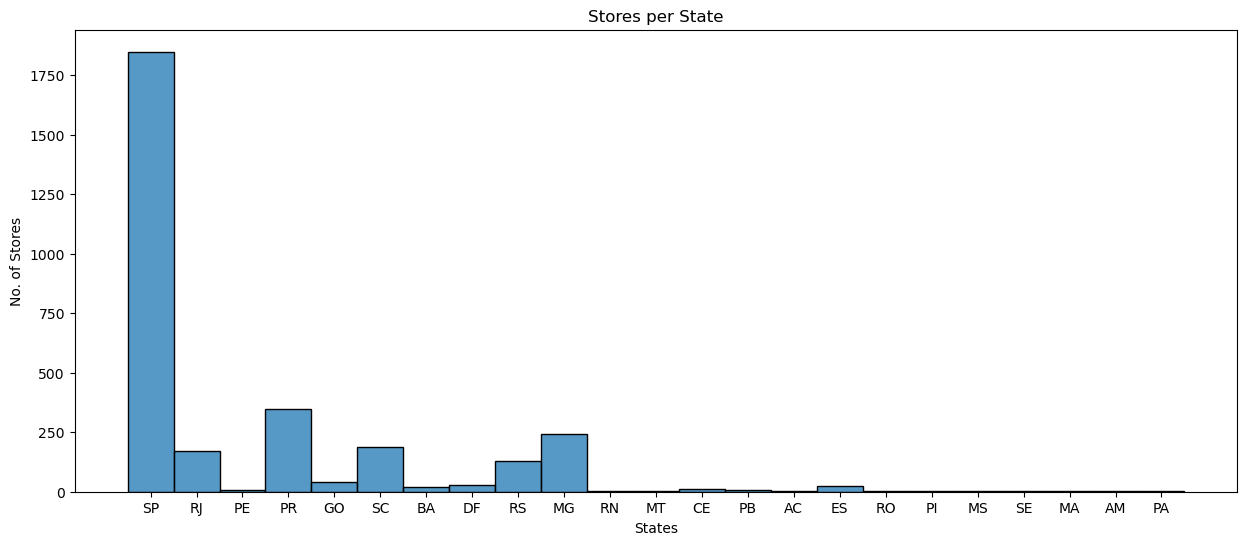

In [31]:
plt.figure(figsize=(15, 6))
sns.histplot(
    data=sellers, 
    x = 'seller_state')
plt.title('Stores per State')
plt.xlabel('States')
plt.ylabel('No. of Stores');

In order to Analyze this Data the best way posible I've chosen to split the data into two groups:
- The Sau Pablo (SP) state
- All other Brazelean states

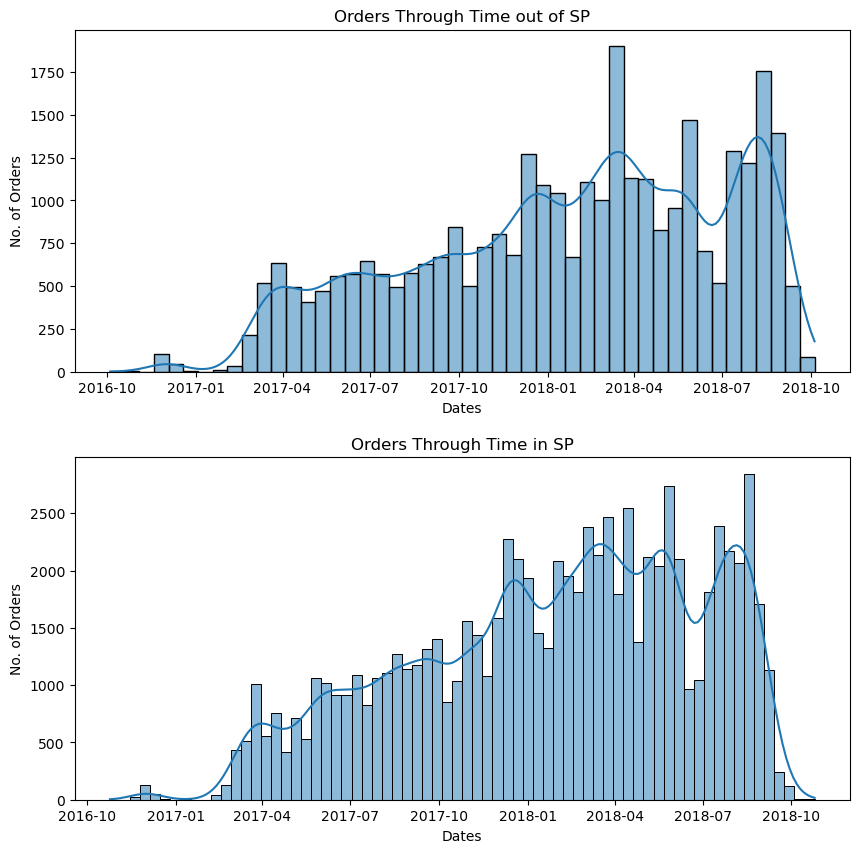

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10, 10))
fig.subplots_adjust(hspace=0.25)

plt.figure(figsize=(20, 8))
sns.histplot(
    data=data[data['seller_state'] != 'SP'], 
    x = 'estimated_date',
    stat = 'count',
    kde = True,
    ax = axes[0]
    )
axes[0].set_title('Orders Through Time out of SP')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('No. of Orders');

plt.figure(figsize=(20, 8))
sns.histplot(
    data=data[data['seller_state'] == 'SP'], 
    x = 'estimated_date',
    stat = 'count',
    kde = True,
    ax = axes[1]
    )
axes[1].set_title('Orders Through Time in SP')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('No. of Orders');

The following is a number of graphs by quarter for 2017 and 2018.
Specifically around the orders that were not delivered.
We can see that the number progressively increases through time.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7420\3938116606.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data = data[data['estimated_date'].dt.year == 2017][data['Quarter']==4][data['order_status'] != 'delivered'],
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7420\3938116606.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data = data[data['estimated_date'].dt.year == 2017][data['Quarter']==4][data['order_status'] != 'delivered'],
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7420\3938116606.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data = data[data['estimated_date'].dt.year == 2017][data['Quarter']==2][data['order_status'] != 'delivered'],
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7420\3938116606.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data = data[data['estimated_date

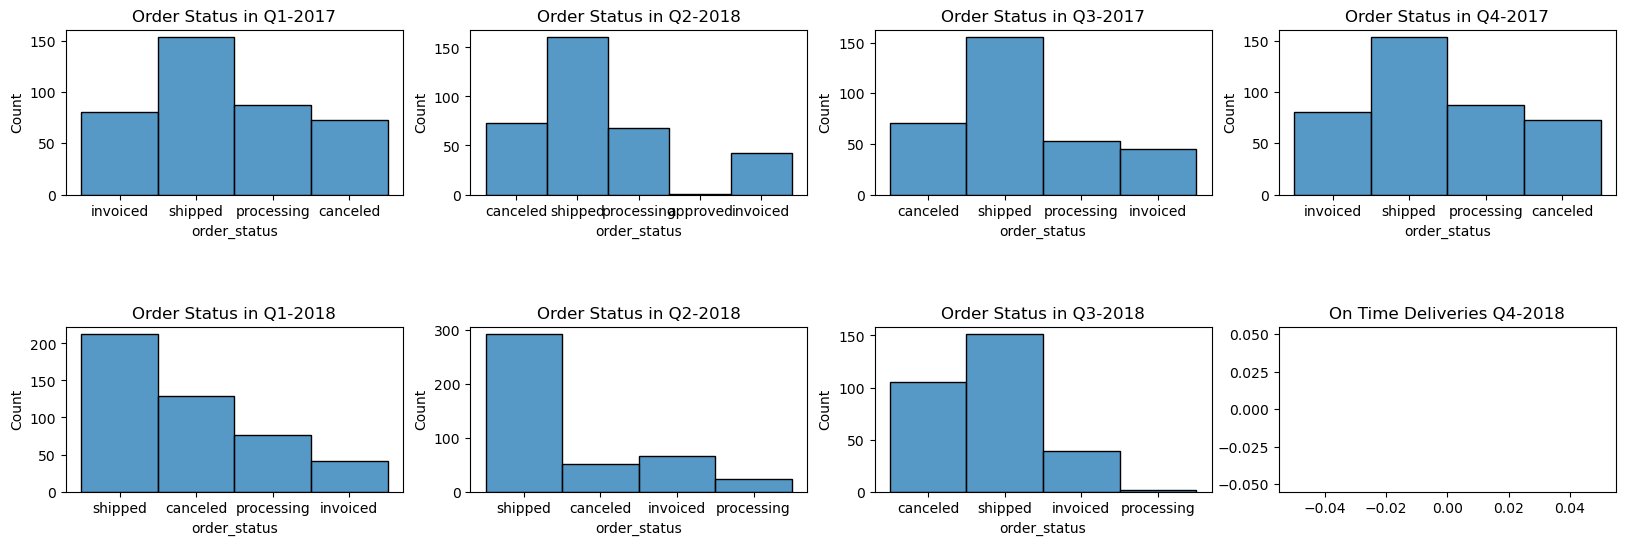

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20, 6))
fig.subplots_adjust(hspace=0.8)

sns.histplot(data = data[data['estimated_date'].dt.year == 2017][data['Quarter']==4][data['order_status'] != 'delivered'],
    x = 'order_status',
    stat = 'count',
    ax = axes[0,0]
)
axes[0,0].set_title('Order Status in Q1-2017')

sns.histplot(data = data[data['estimated_date'].dt.year == 2017][data['Quarter']==2][data['order_status'] != 'delivered'],
    x = 'order_status',
    stat = 'count',
    ax = axes[0,1]
)
axes[0,1].set_title('Order Status in Q2-2018')

sns.histplot(data = data[data['estimated_date'].dt.year == 2017][data['Quarter']==3][data['order_status'] != 'delivered'],
    x = 'order_status',
    stat = 'count',
    ax = axes[0,2]
)
axes[0,2].set_title('Order Status in Q3-2017')

sns.histplot(data = data[data['estimated_date'].dt.year == 2017][data['Quarter']==4][data['order_status'] != 'delivered'],
    x = 'order_status',
    stat = 'count',
    ax = axes[0,3]
)
axes[0,3].set_title('Order Status in Q4-2017')

sns.histplot(data = data[data['estimated_date'].dt.year == 2018][data['Quarter']==1][data['order_status'] != 'delivered'],
    x = 'order_status',
    stat = 'count',
    ax = axes[1,0]
)
axes[1,0].set_title('Order Status in Q1-2018')

sns.histplot(data = data[data['estimated_date'].dt.year == 2018][data['Quarter']==2][data['order_status'] != 'delivered'],
    x = 'order_status',
    stat = 'count',
    legend = True,
    ax = axes[1,1]
    )
axes[1,1].set_title('Order Status in Q2-2018')

sns.histplot(data = data[data['estimated_date'].dt.year == 2018][data['Quarter']==3][data['order_status'] != 'delivered'],
    x = 'order_status',
    stat = 'count',
    legend = True,
    ax = axes[1,2]
    )
axes[1,2].set_title('Order Status in Q3-2018')

sns.histplot(data = data[data['estimated_date'].dt.year == 2018][data['Quarter']==4][data['order_status'] != 'delivered'],
    x = 'order_status',
    stat = 'count',
    ax = axes[1,3]
    )
axes[1,3].set_title('On Time Deliveries Q4-2018');

On another note there is the delayed vs on-time deliveries.
From 2017 to 2018 there is a growth for both on time and delayed deliveries.
However, with time the company should be aiming for better numbers. on one side to at least keep the proportions of delayed vs On-time deliveries.
Below are a comparison between the number and the percentage of these two.
That and the graphs above showing an increase of orders indicates that the service in general could be lacking and should be better looked into.

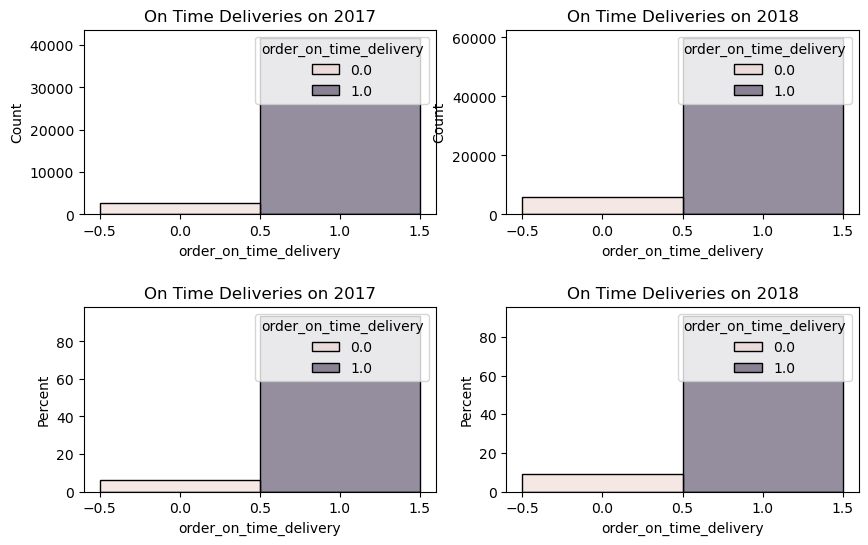

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10, 6))
fig.subplots_adjust(hspace=0.5)
sns.histplot(data = data[data['estimated_date'].dt.year == 2017],
    x = 'order_on_time_delivery',
    stat = 'count',
    hue = 'order_on_time_delivery',
    discrete = True,
    ax = axes[0,0]
)
axes[0,0].set_title('On Time Deliveries on 2017')


sns.histplot(data = data[data['estimated_date'].dt.year == 2018],
    x = 'order_on_time_delivery',
    stat = 'count',
    hue = 'order_on_time_delivery',
    discrete = True,
    ax = axes[0,1]
)
axes[0,1].set_title('On Time Deliveries on 2018')


sns.histplot(data = data[data['estimated_date'].dt.year == 2017],
    x = 'order_on_time_delivery',
    stat = 'percent',
    hue = 'order_on_time_delivery',
    discrete = True,
    ax = axes[1,0]
)
axes[1,0].set_title('On Time Deliveries on 2017')


sns.histplot(data = data[data['estimated_date'].dt.year == 2018],
    x = 'order_on_time_delivery',
    stat = 'percent',
    hue = 'order_on_time_delivery',
    discrete = True,
    ax = axes[1,1]
)
axes[1,1].set_title('On Time Deliveries on 2018');



Further work needs to be done to determine root cause and direct correlation with the disruption in business growth through the 3rd year.

# APENDIX BELLOW

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import folium

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [3]:
data = pd.read_csv('./data/items_seller_orders.csv')
sellers = pd.read_csv('./data/olist_sellers_dataset.csv')

In [4]:
data["shipping_limit_date"] = pd.to_datetime(data["shipping_limit_date"], format = "%Y-%m-%d %H:%M:%S")
data["order_delivered_customer_date"] = pd.to_datetime(data["order_delivered_customer_date"], format = "%Y-%m-%d %H:%M:%S")
data["order_estimated_delivery_date"] = pd.to_datetime(data["order_estimated_delivery_date"], format = "%Y-%m-%d")
data['delivered_date']= data['order_delivered_customer_date'].dt.date
data['estimated_date']= data['order_estimated_delivery_date'].dt.date
data["delivered_date"] = pd.to_datetime(data["delivered_date"], format = "%Y-%m-%d")
data["estimated_date"] = pd.to_datetime(data["estimated_date"], format = "%Y-%m-%d")

In [10]:
data['Quarter'] = data['estimated_date'].dt.quarter
data.head()

Unnamed: 0                          order_id  order_item_id  \
0           0  00010242fe8c5a6d1ba2dd792cb16214              1   
1           1  00018f77f2f0320c557190d7a144bdd3              1   
2           2  000229ec398224ef6ca0657da4fc703e              1   
3           3  00024acbcdf0a6daa1e931b038114c75              1   
4           4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date seller_state                       customer_id  \
0 2017-09-19 09:45:35           SP  3ce436f183e68e07877b285a838db11a   
1 2017-05-03 11:05:13           SP  f6dd3ec061db4e3987629fe6b26e5cce   
2 2018-01-18 14:48:30           MG  6489ae5e4333f3693df5ad4372dab6d3   
3 2018-08-15 10:10:18           SP  d4eb9395c8c0431ee92fce09860c5a06   
4 2017-02-13 13:57:51           PR  58dbd0b2d70206bf40e62cd34e84d795   

  order_status order_delivered_customer_date order_estimated_delivery_date  \
0    delivered           2017-09-20 23:43:48                    2017-09-29   
1    delivered           2017-05-12 16:04:24                    2017-05-15   
2    delivered           2018-01-22 13:19:16                    2018-02-05   
3    delivered           2018-08-14 13:32:39                    2018-08-20   
4    delivered           2017-03-01 16:42:31                    2017-03-17   

   order_on_time_delivery delivered_date estimated_date  Quarter  
0                     1.0     2017-09-20     2017-09-29        3  
1                     1.0     2017-05-12     2017-05-15        2  
2                     1.0     2018-01-22     2018-02-05        1  
3                     1.0     2018-08-14     2018-08-20        3  
4                     1.0     2017-03-01     2017-03-17        1

In [14]:
SP_sellers = sellers['seller_zip_code_prefix'][sellers['seller_state'] == 'SP'].unique()

In [9]:
data["order_on_time_delivery"]= np.where(data['order_delivered_customer_date'].isna(), np.nan, data["order_on_time_delivery"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     112650 non-null  int64         
 1   order_id                       112650 non-null  object        
 2   order_item_id                  112650 non-null  int64         
 3   product_id                     112650 non-null  object        
 4   seller_id                      112650 non-null  object        
 5   shipping_limit_date            112650 non-null  datetime64[ns]
 6   seller_state                   112650 non-null  object        
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_delivered_customer_date  110196 non-null  datetime64[ns]
 10  order_estimated_delivery_date  112650 non-null  datetime64[ns]
 11  

In [1]:
!pip install jupyterlab_hide_code
!pip install folium fontawesome
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install cufflinks


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
